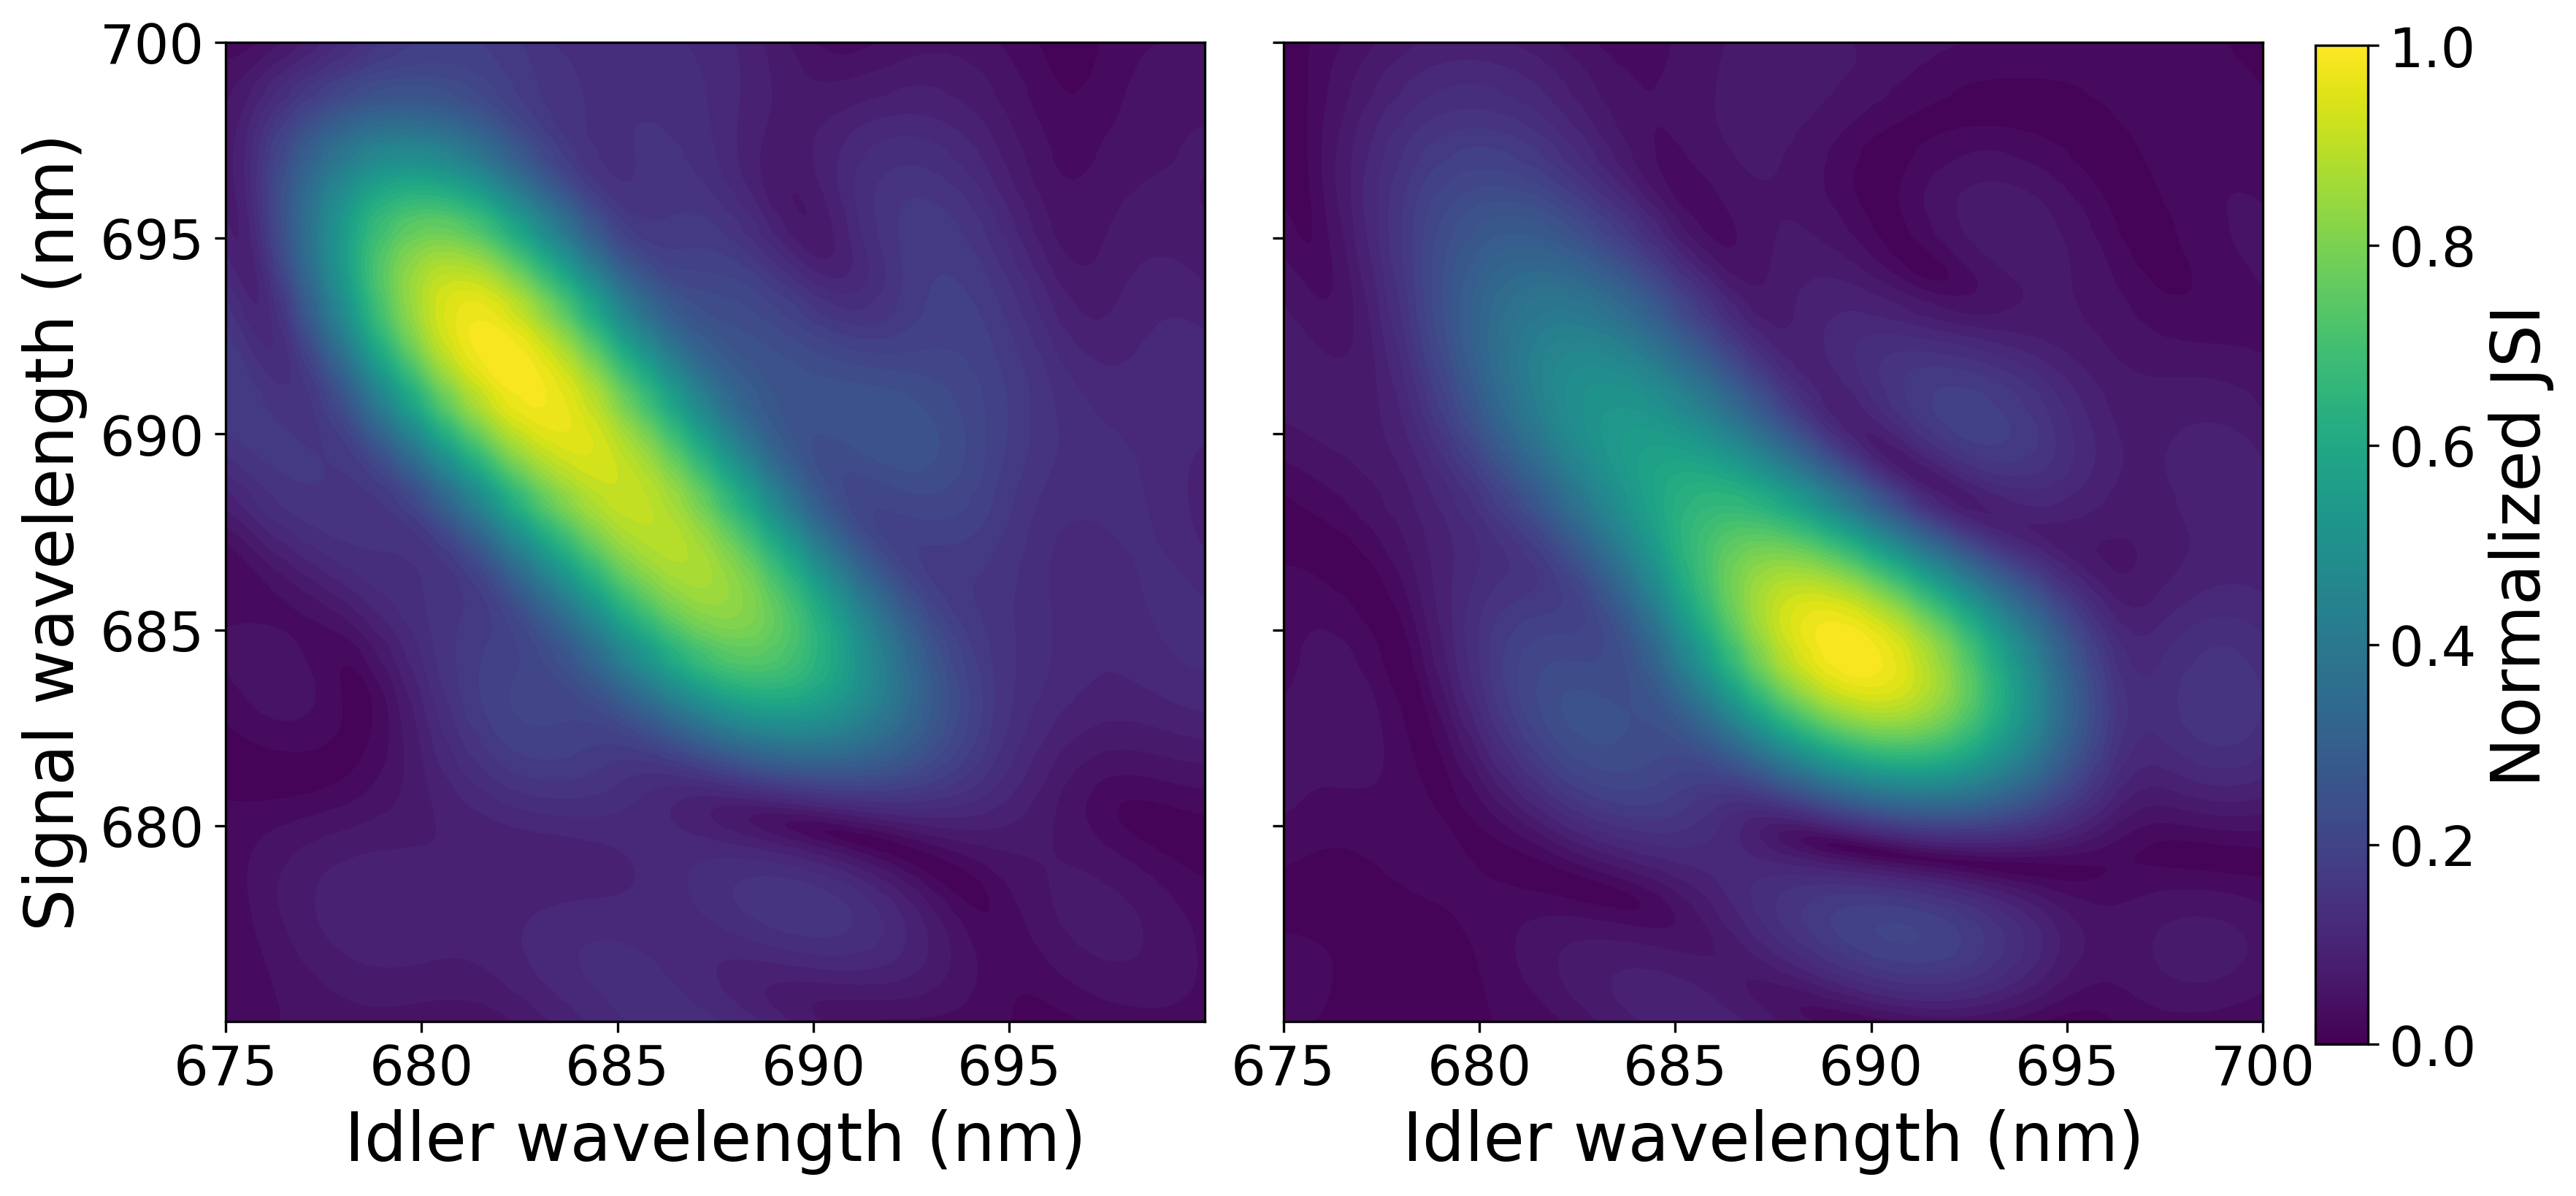

In [2]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
                
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



def freq(x):
    # wavelength in nm to frequency in Hz
    w = 1239.8 / (x*4.136*10**(-15))
    return w

lambda0 = 685 # nm
w0 = freq(lambda0) # central downconverted frequency


x = np.arange(675.0, 700.0, 0.02)
y = np.arange(675.0, 700.0, 0.02)

x1 = np.arange(660.0, 710.0, 0.02)

sig = freq(688)-freq(682)

#check filter shape
z = np.exp(-((freq(x)-w0)**4)/(2*sig**4))

# fig, ax = plt.subplots()
# ax.plot(x, z)
# plt.show()


X, Y = np.meshgrid(x, y)

vs = freq(X) - w0
vi = freq(Y) - w0


Z = np.exp(-(vi**2+vs**2)/(2*sig**2))*np.exp(-(2*vs*vi)/(2*sig**2))
# Z = Z*np.conjugate(Z)

detection_filter = np.exp(-((vs)**4)/(2*(freq(685)-freq(675))**4))*np.exp(-((vi)**4)/(2*(freq(685)-freq(675))**4))
# ax.plot(x,detection_filter)
# plt.show()

Z = Z*detection_filter


gamma = 1 / 0.00000000000015
cav = 690 # cavity mode in nm


## two-sided cavity from Gardiner and Collett
## assuming uni-directional input and equal mirrors (a_in = 0)
output2 = gamma/(gamma + 1j*(freq(X)-freq(cav)))
Z2 = Z*output2

#######################################

## BBO data

wave_old= np.loadtxt('/home/sameer/Desktop/biphoton/wave_old.txt')
wave_new= np.loadtxt('/home/sameer/Desktop/biphoton/wave_new.txt')
FT = np.loadtxt('/home/sameer/Desktop/biphoton/FT.txt', delimiter=',', dtype=np.complex128)

## empty microcavity data

wave_old2= np.loadtxt('/home/sameer/Desktop/biphoton/wave_old2.txt')
wave_new2= np.loadtxt('/home/sameer/Desktop/biphoton/wave_new2.txt')
FT2 = np.loadtxt('/home/sameer/Desktop/biphoton/FT2.txt', delimiter=',', dtype=np.complex128)

######################################

fig = plt.figure(figsize=(12, 12), dpi=300)  # Bigger and higher resolution
colornorm = mpl.colors.TwoSlopeNorm(vmin=0, vcenter=0.5, vmax=1)
plt.rcParams.update({'font.size': 16})  # Default font size bump

gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[1,1])

ax1 = fig.add_subplot(gs[0,0], box_aspect=1)
ax2 = fig.add_subplot(gs[0,1], box_aspect=1, sharey=ax1)

# Plot data
cf1 = ax1.contourf(wave_old[:], wave_new[:], np.abs(FT)/np.max(np.abs(FT)), cmap='viridis', levels=60)
ax1.set_ylabel('Signal wavelength (nm)', fontsize=22)
ax1.set_xlabel("Idler wavelength (nm)", fontsize=22)
ax1.set_xticks([675, 680, 685, 690, 695])    
ax1.set_ylim(675, 700)

# Remove the first tick on the y-axis
ax1.set_yticks(ax1.get_yticks()[1:])  # Skip the first y-tick

cf2 = ax2.contourf(wave_old2[:], wave_new2[:], np.abs(FT2)/np.max(np.abs(FT2)), cmap='viridis', levels=60)
ax2.set_xlabel("Idler wavelength (nm)", fontsize=22)

ax2.set_xlim(675, 700)
ax2.set_ylim(675, 700)

# Improve tick sizes
ax1.tick_params(labelbottom=True, labelsize=18)
ax2.tick_params(labelbottom=True, labelleft=False, labelsize=18)

# Colorbar
sm = plt.cm.ScalarMappable(cmap="viridis", norm=colornorm)
sm.set_array([])

cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.38])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Normalized JSI", fontsize=22)
cbar.ax.tick_params(labelsize=18)

# Layout tweaks
plt.subplots_adjust(hspace=0, wspace=0.08)

# # Save with better DPI and layout
plt.savefig('experimental_JSI_results_highres.png', dpi=300, bbox_inches='tight')
